Importing basic Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import collections
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

import wordcloud
from wordcloud import WordCloud, STOPWORDS 

C:\ProgramData\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\ProgramData\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
!pip install plotly

Considering the Cleaned Data So no pre processing wilbe required

In [ ]:
df_tweets = pd.read_csv("Processed Data - Pfizer.csv")

In [ ]:
df_tweets.head(5)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380234113081350  2021-09-24 12:33:22   
1           1             1  1441380226131390472  2021-09-24 12:33:20   
2           2             2  1441380207655460865  2021-09-24 12:33:15   
3           3             3  1441380207517003781  2021-09-24 12:33:15   
4           4             4  1441380151955128325  2021-09-24 12:33:02   

               Source  Retwwet_Count                             User_Name  \
0     Twitter Web App              0                         XLOLOLOLOLOLX   
1     Twitter Web App              0                          Jack Schmidt   
2  Twitter for iPhone              0                        Fred Zarnowski   
3     Twitter Web App              0                            TheRealFly   
4     Twitter Web App              0  UNC OtolaryngologyHead  Neck Surgery   

                                              tweets  text_length  
0   permit  pfizer biontech covid         httpssk...           24  
1   bourla  employee join scrum    drug pricing f...           22  
2   weselymd    malmet  cdcgov  cdcdirector   per...           26  
3             talk full license covid    singapore             10  
4  congrats  profbrentsenior  receive  pfizer int...           50

In [ ]:
import nltk
#nltk.download('book')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
df_tweets["tweets"] = df_tweets['tweets'].str.replace(r'\b\w{15,3000}\b', r' ')

In [ ]:
df_tweets["tweets"] = df_tweets['tweets'].str.replace('deliver', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('https', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('corona', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('covid', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('total', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('like', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('moderna', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('make', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('pfizer', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('would', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('take', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('first', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('second', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('know', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('people', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('data', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('wait', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('johnson', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('what', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('year', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('mrna', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('even', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('month', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('this', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('astrazeneca', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('also', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('week', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('still', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('chief', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('worker', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('director', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('biontech', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('agency', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('american', '')
df_tweets["tweets"] = df_tweets['tweets'].str.replace('millions', '')


In [ ]:
from collections import Counter
cnt = Counter()
for text in df_tweets['tweets'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(20)

[('annoyed', 781),
 ('undecided', 780),
 ('uneasy', 780),
 ('hesitant', 780),
 ('skeptical', 779),
 ('s', 245),
 ('risk', 227),
 ('panel', 201),
 ('shot', 187),
 ('vaccine', 177),
 ("'", 173),
 ('booster', 149),
 ('overrules', 138),
 ('dose', 99),
 ('recommends', 81),
 ('need', 80),
 ('endorse', 63),
 ('million', 61),
 ('available', 59),
 ('high', 58)]

In [ ]:
FREQWORDS = set([w for (w, wc) in cnt.most_common(20)])
def remove_freqwords(text):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

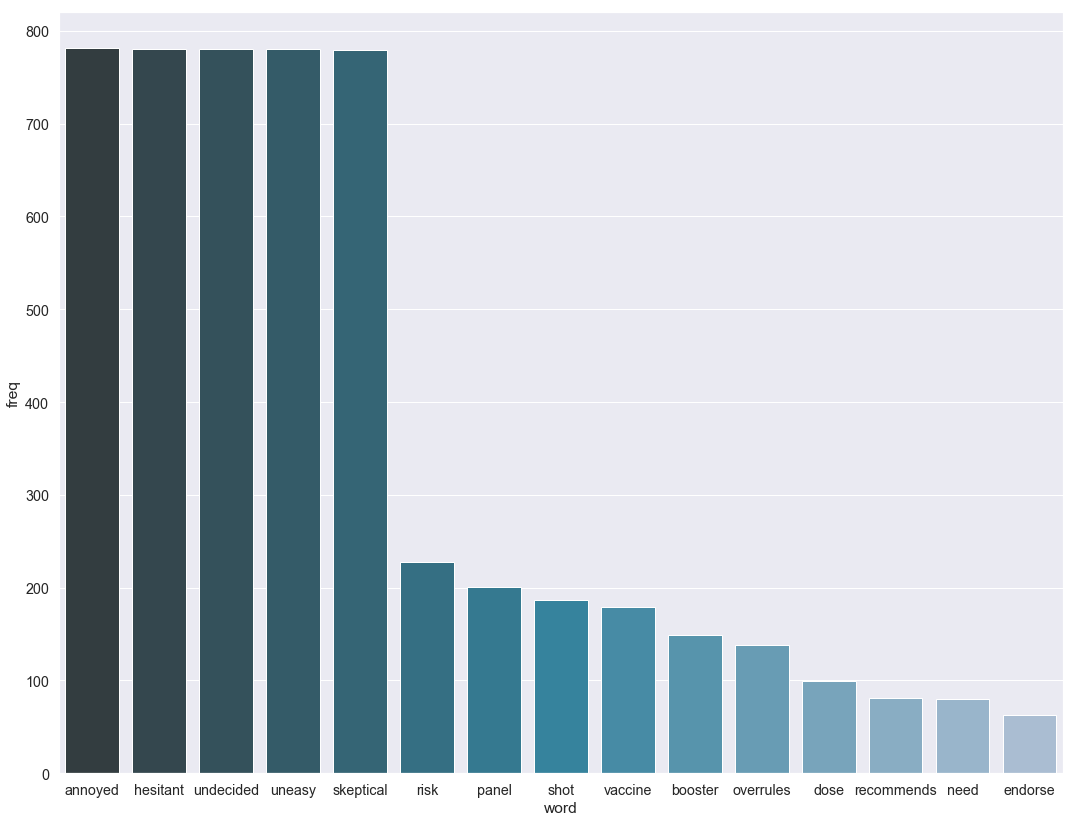

In [ ]:
sr_clean= df_tweets['tweets']
cv = CountVectorizer()
bow = cv.fit_transform(sr_clean)
word_freq = dict(zip(cv.get_feature_names(), np.asarray(bow.sum(axis=0)).ravel()))
word_counter = collections.Counter(word_freq)

word_counter_df = pd.DataFrame(word_counter.most_common(15), columns = ['word', 'freq'])
fig, ax = plt.subplots(figsize=(18, 14))
sns.barplot(x="word", y="freq", data=word_counter_df, palette="PuBuGn_d", ax=ax)
plt.show();

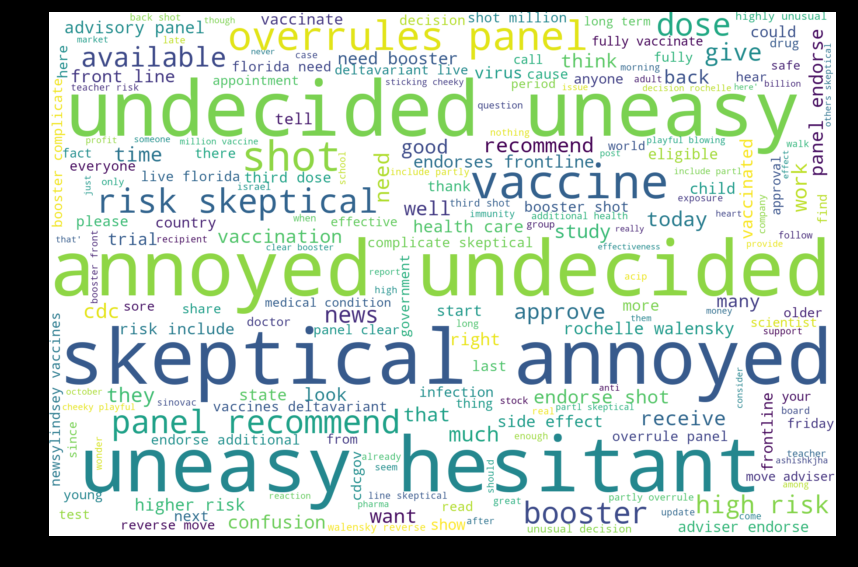

In [ ]:
# Word Cloud

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

stopwords = lemmatize_words_1(df_tweets['tweets'])

comment_words = ' '

for val in df_tweets['tweets']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Black') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
from nltk import bigrams
# Create list of lists containing bigrams in tweets
key_words = [text.lower().split() for text in df_tweets.tweets]
terms_bigram = [list(bigrams(text)) for text in key_words]
terms_bigram[0]

[('permit', 'skeptical'),
 ('skeptical', 'annoyed'),
 ('annoyed', 'undecided'),
 ('undecided', 'uneasy'),
 ('uneasy', 'hesitant'),
 ('hesitant', 'urfdtqybc')]

In [ ]:
df_tweets['Sentiment_Scores'] = df_tweets['tweets'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [ ]:
df_tweets.head(5)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380234113081350  2021-09-24 12:33:22   
1           1             1  1441380226131390472  2021-09-24 12:33:20   
2           2             2  1441380207655460865  2021-09-24 12:33:15   
3           3             3  1441380207517003781  2021-09-24 12:33:15   
4           4             4  1441380151955128325  2021-09-24 12:33:02   

               Source  Retwwet_Count                             User_Name  \
0     Twitter Web App              0                         XLOLOLOLOLOLX   
1     Twitter Web App              0                          Jack Schmidt   
2  Twitter for iPhone              0                        Fred Zarnowski   
3     Twitter Web App              0                            TheRealFly   
4     Twitter Web App              0  UNC OtolaryngologyHead  Neck Surgery   

                                              tweets  text_length  \
0   permit             skeptical annoyed undecide...           24   
1   bourla  employee join scrum    drug pricing f...           22   
2   weselymd    malmet  cdcgov  cdc   person    j...           26   
3                  talk full license     singapore             10   
4  congrats     receive   international surgical ...           50   

   Sentiment_Scores  
0           -0.8555  
1           -0.8689  
2           -0.3182  
3            0.0000  
4           -0.9270

In [ ]:
df_tweets['Sentiment'] = df_tweets['Sentiment_Scores'].apply(lambda s : 
                                                             'Positive' if s > 0 else ('Negative' if s < 0 else 'Neutral'))

In [ ]:
df_tweets.head(10)

Unnamed: 0  Unnamed: 0.1                   Id            Timestamp  \
0           0             0  1441380234113081350  2021-09-24 12:33:22   
1           1             1  1441380226131390472  2021-09-24 12:33:20   
2           2             2  1441380207655460865  2021-09-24 12:33:15   
3           3             3  1441380207517003781  2021-09-24 12:33:15   
4           4             4  1441380151955128325  2021-09-24 12:33:02   
5           5             5  1441380143105142799  2021-09-24 12:33:00   
6           6             6  1441380136738189327  2021-09-24 12:32:58   
7           7             7  1441380071294455809  2021-09-24 12:32:43   
8           8             8  1441380034741112841  2021-09-24 12:32:34   
9           9             9  1441380001320951809  2021-09-24 12:32:26   

                Source  Retwwet_Count                             User_Name  \
0      Twitter Web App              0                         XLOLOLOLOLOLX   
1      Twitter Web App              0                          Jack Schmidt   
2   Twitter for iPhone              0                        Fred Zarnowski   
3      Twitter Web App              0                            TheRealFly   
4      Twitter Web App              0  UNC OtolaryngologyHead  Neck Surgery   
5   Twitter for iPhone              0                                 Jason   
6      Twitter Web App              0                          stevenscraig   
7  Twitter for Android              0                        faridahmedkhan   
8   Twitter for iPhone              0                      Stephani Shelton   
9      Twitter Web App              0                   Infectious Diseases   

                                              tweets  text_length  \
0   permit             skeptical annoyed undecide...           24   
1   bourla  employee join scrum    drug pricing f...           22   
2   weselymd    malmet  cdcgov  cdc   person    j...           26   
3                  talk full license     singapore             10   
4  congrats     receive   international surgical ...           50   
5  guess    talk   cdc    vaccine  vaccinemandate...           33   
6           banternative  iancrichton   malchandl...          232   
7     '  hear  irrespective  necessity  fees   ne...           17   
8   debjshaw anyone compromise immunity   able   ...           33   
9   dovey               there specifics  ' broad ...           45   

   Sentiment_Scores Sentiment  
0           -0.8555  Negative  
1           -0.8689  Negative  
2           -0.3182  Negative  
3            0.0000   Neutral  
4           -0.9270  Negative  
5           -0.9337  Negative  
6            0.0000   Neutral  
7            0.0000   Neutral  
8            0.6808  Positive  
9           -0.9571  Negative

In [ ]:
df_tweets.Sentiment.value_counts()

Negative    820
Positive    240
Neutral     152
Name: Sentiment, dtype: int64

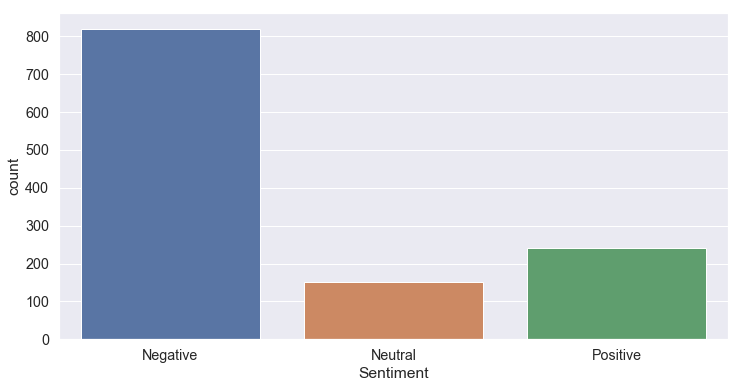

In [ ]:
temp = df_tweets.groupby('Sentiment').count()['tweets'].reset_index().sort_values(by='tweets',ascending=False)
temp.style.background_gradient(cmap='Purples')

plt.figure(figsize=(12,6))
sns.countplot(x='Sentiment',data=df_tweets)
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.tweets,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<BarContainer object of 3 artists>

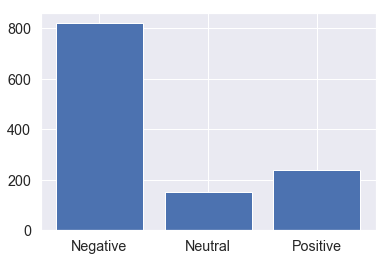

In [ ]:
array = np.array(df_tweets.Sentiment)
unique, counts = np.unique(array, return_counts=True)
np.column_stack((unique, counts)) 
plt.bar(unique, counts)

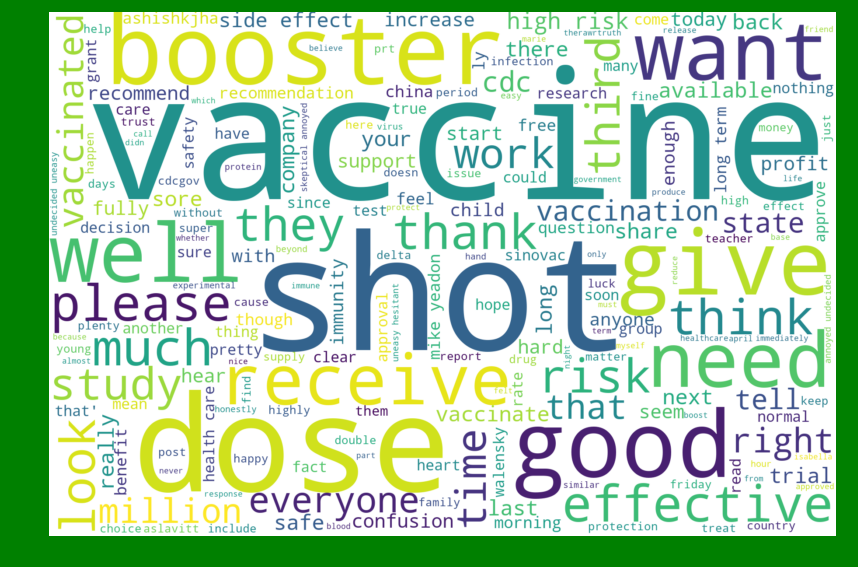

In [ ]:
# Word Cloud for POSITIVE Words
df_tweets["tweets_2"] = df_tweets['tweets'].str.replace('refund', '')
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

pos_data = df_tweets[df_tweets['Sentiment'] =='Positive']
stopwords = lemmatize_words_1(df_tweets['tweets_2'])

comment_words = ' '

for val in pos_data['tweets_2']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Green') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

In [ ]:
df_tweets["tweets_1"] = df_tweets['tweets'].str.replace('undecided', '')

In [ ]:
df_tweets["tweets_1"] = df_tweets['tweets_1'].str.replace('shall', '')

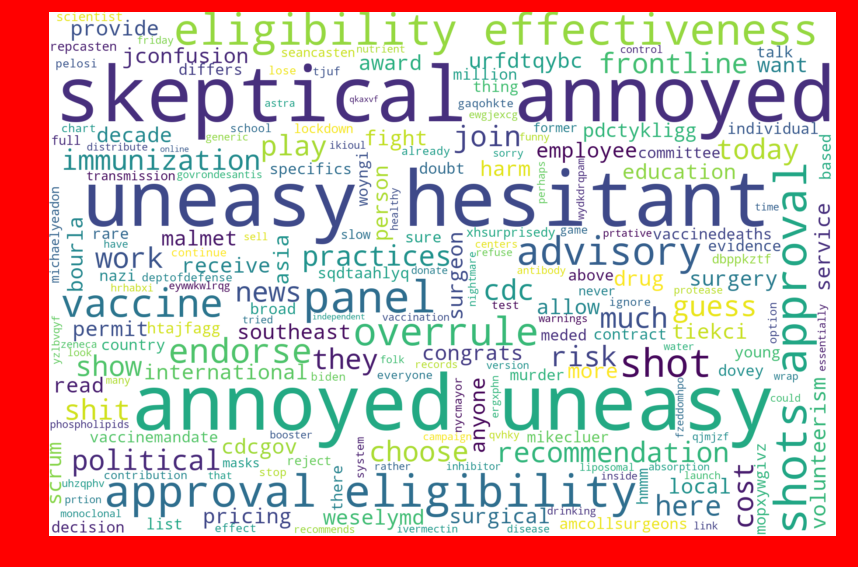

In [ ]:
# Word Cloud for NEGATIVE Words

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words_1(text):
    pos_tagged_text = nltk.pos_tag(text)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
    for word, pos in pos_tagged_text])

neg_data = df_tweets[df_tweets['Sentiment'] =='Negative']
stopwords = lemmatize_words_1(df_tweets['tweets_1'])

comment_words = ' '

for val in neg_data['tweets_1'][:30]: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
      comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                      
plt.figure(figsize = (12, 12), facecolor = 'Red') 
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.tight_layout(pad = 1) 
  
plt.show() 

**************************  End ****************************